<a href="https://colab.research.google.com/github/DataRecouver/Codes-DataScience-Python/blob/main/Data%20Mining/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução
### **Desafio Titanic - Conclusão**


---
## Atividade TITANIC
* Grupo
Ane Caroline <br/>
Carlos Alício <br/>
Felipe Coelho <br/>
Guilherme Cruz <br/>
---

***Prazo para entrega: 04 de Mar., 23:59***

Dataset: https://www.kaggle.com/competitions/titanic/data

## Objetivos da Análise

O dataset que trabalharemos nesta atividade nos fornece dados de passageiros do Titanic, incluindo se eles sobreviveram ou não ao naufrágio. O desafio original do Kaggle propõe que seja criado um classificador capaz de identificar se um passageiro sobreviveu ou não ao desastre. Faremos isso, mas não agora.

Considerem que ocorreu um desastre onde um bom número de pessoas morreu, mas outras sobreviveram. A principal pergunta que nos surge é: quais fatores foram determinantes para que alguns sobrevivessem e outros não?
Vamos tentar responder essa pergunta por meio de uma tarefa de análise descritiva dos dados. Como vocês verão ao explorar o dataset, existe bastante trabalho de pré-processamento a ser realizado, contudo, lembrem-se que o objetivo aqui é que este tratamento dos dados busque auxiliar vocês analistas a identificarem padrões nos dados e não traduzi-los para que um algoritmo de aprendizado o faça.

Ao final do código, incluam um resumo das informações relevantes encontradas.
Minha sugestão é que vocês explorem ao máximo o dataset, entendam os atributos, como eles se relacionam com o target, mas não só com ele. Assim, vocês conseguirão identificar melhores estratégias de pré-processamento que virão a favorecer a qualidade da análise.

Basta uma entrega por equipe, mas e imprescidível que vocês informem o nome dos integrantes da equipe.

Concluir o desafio do Titanic. 


Para tanto, as equipes devem gerar classificadores para a base fornecida usando os algoritmos KNN, árvore de decisão e random forest, variando os parâmetros de cada um deles (recomendo o uso de gridsearch).


Lembrem de testar diferentes conjuntos de atributos. 


Para identificar os melhores conjuntos, vocês podem usar as informações que vocês obtiveram na análise exploratória, técnicas de seleção de atributos (o sklearn tem algumas funções para isso) e o próprio random forest retorna a importância dos atributos.


Depois de gerar os diferentes classificadores, façam a avaliação para identificar o melhor conjunto de atributos, algoritmo de aprendizado e configuração de parâmetros, treine um novo classificador com todo o conjunto de treinamento e classifiquem o conjunto de teste fornecido na página do desafio do Kaggle.

#Importação de bibliotecas


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


pd.set_option("display.precision", 2)

#Carregamento do dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/felipepcoelho/titanic/main/train.csv')
df_teste = pd.read_csv('https://raw.githubusercontent.com/felipepcoelho/titanic/main/test.csv')

**Nota:** De modo a facilitar o carregamento do dataset, em virtude do Google Colab reiniciar o ambiente, realizamos a inclusão do dataset em um servidor github e deste modo podendo ser carregado a qualquer momento durante a execução do projeto. 

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [ ]:
df_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.29,NaN,S


Utilizamos o comando *head* sobre o dataset criado para visualizar se ocorreu o correto carregamento dos registros e como estão sendo apresentados os seus atributos   

#Análise dos atributos

In [ ]:
# Utilizamos a função columns para visualizar os nomes dos atributos existentes no dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Esse é um comando muito importante, utilizado para ter uma visão geral dos rótulos das colunas, 
# tipos dos dados, entre outras características do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df["Survived"][df['Cabin'].notna()].value_counts()

1    136
0     68
Name: Survived, dtype: int64

Através do comando  “info” podemos observar que os atributos Age apresenta somente 714 registro em uma amostra de 891 o que demonstra que cerca de 177 registros possuem dados faltantes “NaN” dentro da amostra. O atributo cabin apresenta 204 registros e Embarked 891 dentro da amostra de 891 registros presente no dataset. Vamos incialmente analisar e tratar estes atributos do dataset buscando estratégias para complementar essas informações ausentes ou até mesmo descartar da amostra.  

In [ ]:
#utilizamos a função unique para visualizar os valores exclusivos sobre o atributo idade
print(df["Age"].unique())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [ ]:
# Através da função 'describe' buscamos visualizar valores da média, mínimo e máximo. Alem disso, observamos
# a distribuição dos registros dentro da amostra 
df["Age"].describe()

count    714.00
mean      29.70
std       14.53
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       80.00
Name: Age, dtype: float64

Observa-se que existem valores de idade em formato decimal, 0.??, o que nos indica a possibilidade de o dado estar truncado, com preenchimento incorreto ou que possa se tratar de crianças (bebês). Vamos verificar quantos registros apresentaram este comportamento    

#####Verificação de pessoas a bordo com idades entre 0 e 1 (Bebês).

In [ ]:
# aplicamos o filtro sobre o dataset para identificar registros com idade maior que 0 e menores que 1
# que sejam do sexo masculino
df[((df['Age'] > 0) & (df['Age'] < 1)) & (df['Sex'] == 'male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.00,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.50,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.52,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.75,NaN,S


Observamos que a partir do filtro aplicado, foram retornados somente 5 registros dos 891 presentes na amostra o que representa um total de 0,56% dos registros. Consideramos que embora este dados represente um percentual baixo dentro da amostra estes registros possam ser de grande valia, deste modo, sendo considerada a necessidade de outras analises para uma tomada de decisão sobre os mesmos  

In [ ]:
# aplicamos o filtro sobre o dataset para identificar registros com idade maior que 0 e menores que 1
# que sejam do sexo feminino
df[((df['Age'] > 0) & (df['Age'] < 1)) & (df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.26,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.26,NaN,C


Observamos que a partir do filtro aplicado, foram retornados somente 2 registros dos 891 presentes na amostra o que representa um total de 0,22% dos registros. Consideramos que embora este dados represente um percentual baixo dentro da amostra estes registros possam ser de grande valia, deste modo, sendo considerada a necessidade de outras analises para uma tomada de decisão sobre os mesmos

####Verificação se existem elementos nulos no atributo de idade ('Age').

In [ ]:
# aplicamos a função isna para verificar a ocorrência de dados ausentes na amostra
df[(df['Age'].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.00,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.22,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.22,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.88,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.23,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.50,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.90,NaN,S


A função demonstrou que 177 registros do atributo Age apresentam dados ausentes, deste modo, ratificando a informação encontrada através da visualização dos registros pela função info. 

####Verificação dos elementos do atributo relacionado ao porto em que o passageiro embarcou. ("Embarked")

In [ ]:
# aplicando a função unique sobre o atributo embarked
print(df["Embarked"].unique())

['S' 'C' 'Q' nan]


Através desta função, observamos quais os valores preenchidos aos registros e desta forma buscando tratar as ocorrência de dados NaN que a este atributo representa 0,22% da amostra totalizando 2 registros

In [ ]:
# aplicando a função value_counts para contar valores exclusivos dentro dos registro de um determinado atributo 
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Através desta função, visualizamos a quantidade de registros preenchidos em função do valor aplicado, vale destacar, que este atributo somente assume os valores: S, C e Q 

##Análise para Remoção de atributos

###Atributo: Cabine

O gráfico abaixo exibe a proporção dos valores preenchidos e NaN para o atributo "Cabin"

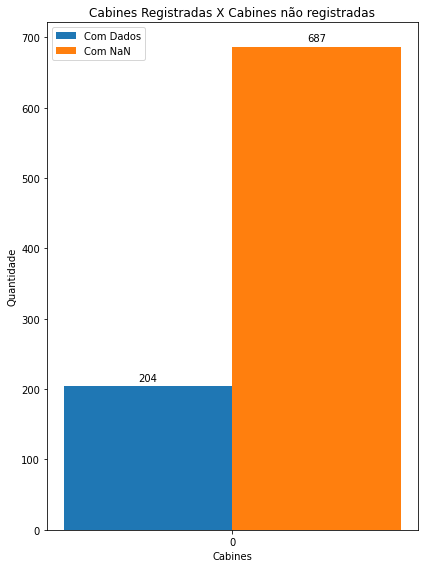

In [ ]:
x = np.arange(1)
width = 0.35

fig, ax = plt.subplots(figsize = (6,8))
barra_nac = ax.bar(x - width/2, df["Cabin"][(df["Cabin"].isnull())==False].count(), width, label='Com Dados')
barra_inter= ax.bar(x + width/2, df["Cabin"].isna().sum().sum(), width, label='Com NaN')

ax.set_title('Cabines Registradas X Cabines não registradas')
ax.set_xlabel('Cabines')
ax.set_ylabel('Quantidade')
ax.set_xticks(x)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(barra_nac)
autolabel(barra_inter)

fig.tight_layout()
plt.show()

O atributo cabin somente apresenta 204 registros preenchidos em um total de 891 registros o que representa 22,89% dos dados preenchidos dentro da amostra. Consideramos que este atributo em função de possuir mais de 50% de dados ausentes não permita aplicamos qualquer tipo de técnica para substituir ou preencher de modo a complementar estes registros. 

### Atributo: PassengerId

Este atributo será removido do dataset em função do mesmo se tratar de um identificador único e não trazendo informação últi ou que possa permitir correlacionar aos demais atributos da amostra.

### Atributo: Name

Este atributo será removido do dataset em função do mesmo se tratarde um identificador único e não trazendo informação últi ou que possa permitir correlacionar aos demais atributos da amostra. Além disso, não foi necessário para utlizar em uma inferência ao dado sexo pois este atributo está sem dados faltantes.

## Tratamento de registros de valor NaN

###Atributo: Sexo

In [ ]:
print(df.Sex.value_counts())
print("---------------------------")
print(df.Sex.isnull().value_counts())

male      577
female    314
Name: Sex, dtype: int64
---------------------------
False    891
Name: Sex, dtype: int64


O atributo sexo não possui valores faltantes ou nulos

###Atributo: Idade

In [ ]:
df["Pclass"][(df['Sex'] == 'male') & (df['Age'].isna())].value_counts()

3    94
1    21
2     9
Name: Pclass, dtype: int64

In [ ]:
df[((df['Sex'] == 'male') & (df['Pclass'] == 1)) & (df['Age'].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.50,C52,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.72,NaN,C
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.93,NaN,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.00,A32,S
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.00,NaN,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.00,A19,S
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.72,NaN,C
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.50,C106,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.00,C128,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.00,A14,S


In [ ]:
df[((df['Sex'] == 'male') & (df['Pclass'] == 1)) & (df['Age'].notna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.86,E46,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.50,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.72,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.17,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.00,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.55,E17,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.50,A24,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.00,B51 B53 B55,S


In [ ]:
df["Age"][((df['Sex'] == 'male') & (df['Pclass'] == 1) & (df['Age'].notna()))]

6      54.0
23     28.0
27     19.0
30     40.0
34     28.0
       ... 
822    38.0
857    51.0
867    31.0
872    33.0
889    26.0
Name: Age, Length: 101, dtype: float64

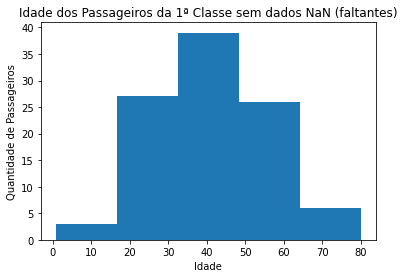

In [ ]:
plt.hist(df["Age"][((df['Sex'] == 'male') & (df['Pclass'] == 1) & (df['Age'].notna()))], bins=5)
plt.title("Idade dos Passageiros da 1ª Classe sem dados NaN (faltantes)")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

In [ ]:
int(df["Age"][(df['Sex'] == 'male') & (df['Pclass'] == 1) & (df['Age'].notna())].mean())

41

Seguimos a seguinte abordagem ao atributo age, como o gráfico dos homens que são do sexo masculino e que são da 1ª Classe e que não apresentam registros faltante de idade apresenta uma distribuição normal optamos então por aplicar a média da idade aos registros que sigam esse filtro de modo a diminuir o número de registros faltantes dentro da amostra. 

In [ ]:
df["Pclass"][(df['Sex'] == 'female') & (df['Age'].isna())].value_counts()

3    42
1     9
2     2
Name: Pclass, dtype: int64

In [ ]:
df[((df['Sex'] == 'female') & (df['Pclass'] == 1)) & (df['Age'].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.52,B78,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.00,E33,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.20,NaN,C
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.88,NaN,C
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.65,NaN,S
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.17,NaN,C
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.86,D21,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.00,C126,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.10,C92,C


In [ ]:
df[((df['Sex'] == 'female') & (df['Pclass'] == 1)) & (df['Age'].notna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.55,C103,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.73,D33,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.00,B28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.87,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.93,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.55,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.16,C50,C


In [ ]:
df["Age"][((df['Sex'] == 'female') & (df['Pclass'] == 1) & (df['Age'].notna()))]

1      38.0
3      35.0
11     58.0
52     49.0
61     38.0
       ... 
856    45.0
862    48.0
871    47.0
879    56.0
887    19.0
Name: Age, Length: 85, dtype: float64

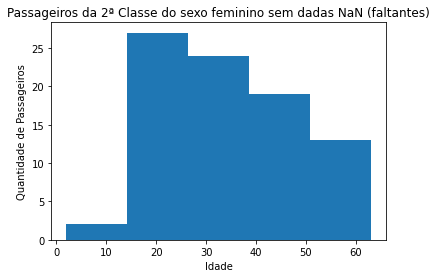

In [ ]:
plt.hist(df["Age"][((df['Sex'] == 'female') & (df['Pclass'] == 1) & (df['Age'].notna()))], bins=5)
plt.title("Passageiros da 2ª Classe do sexo feminino sem dadas NaN (faltantes)")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

In [ ]:
def age_norm(age):
    if age < 1.0:
      return 1.0
    else:
      return age

titanic_df= df['Age']
titanic_df=titanic_df.apply(age_norm)

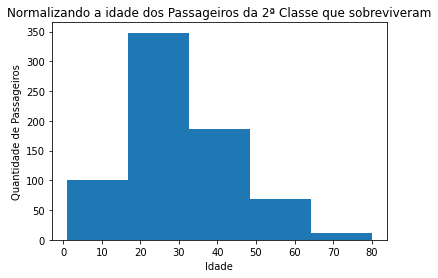

In [ ]:
plt.hist(titanic_df, bins=5)
plt.title("Normalizando a idade dos Passageiros da 2ª Classe que sobreviveram")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

In [ ]:
df['Age'] = titanic_df


In [ ]:
int(df["Age"][(df['Sex'] == 'female') & (df['Pclass'] == 1) & (df['Age'].notna())].mean())

34

A mesma estratégia foi utilizada para o sexo feminino, mas diferente do tratamento para o sexo masculino, esses dados não seguiam uma distribuição normal, mas de assimetria negativa. Foi possível ver durante as análises gerais que o valor mínimo de idade é 0.42, considerando o atributo idade como um número inteiro para relevância da análise, todos os valores menores do que 1, ou seja, 0.42 até o valor máximo <1 foram substituídos por 1.

Tratando NaN em registro de passageiro da 2ª classe

In [ ]:
df[((df['Sex'] == 'male') & (df['Pclass'] == 2)) & (df['Age'].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.00,NaN,S
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.05,NaN,C
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.00,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.00,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.00,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.00,NaN,S
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.86,NaN,C
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.00,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.00,NaN,S


In [ ]:
df[((df['Sex'] == 'male') & (df['Pclass'] == 2)) & (df['Age'].notna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D56,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5,NaN,S
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5,NaN,S
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0,NaN,S
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5,NaN,S
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5,NaN,S


In [ ]:
df["Age"][((df['Sex'] == 'male') & (df['Pclass'] == 2) & (df['Age'].notna()))]

20     35.0
21     34.0
33     66.0
70     32.0
72     21.0
       ... 
848    28.0
861    21.0
864    24.0
883    28.0
886    27.0
Name: Age, Length: 99, dtype: float64

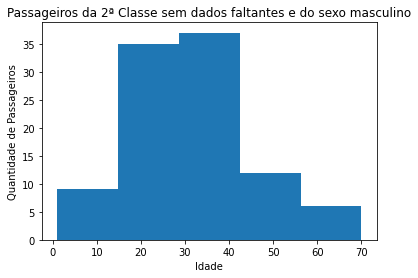

In [ ]:
plt.hist(df["Age"][((df['Sex'] == 'male') & (df['Pclass'] == 2) & (df['Age'].notna()))], bins=5)
plt.title("Passageiros da 2ª Classe sem dados faltantes e do sexo masculino")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

In [ ]:
int(df["Age"][(df['Sex'] == 'male') & (df['Pclass'] == 2) & (df['Age'].notna())].mean())

30

In [ ]:
df["Pclass"][(df['Sex'] == 'female') & (df['Age'].isna())].value_counts()

3    42
1     9
2     2
Name: Pclass, dtype: int64

In [ ]:
df[((df['Sex'] == 'female') & (df['Pclass'] == 2)) & (df['Age'].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.35,E101,Q
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.00,NaN,S


In [ ]:
df[((df['Sex'] == 'female') & (df['Pclass'] == 2)) & (df['Age'].notna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.07,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.00,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.00,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.58,NaN,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.00,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.00,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.00,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.86,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C


In [ ]:
df["Age"][((df['Sex'] == 'female') & (df['Pclass'] == 2) & (df['Age'].notna()))]

9      14.0
15     55.0
41     27.0
43      3.0
53     29.0
       ... 
854    44.0
865    42.0
866    27.0
874    28.0
880    25.0
Name: Age, Length: 74, dtype: float64

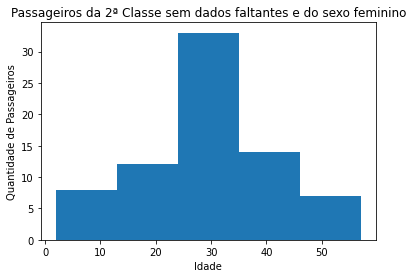

In [ ]:
plt.hist(df["Age"][((df['Sex'] == 'female') & (df['Pclass'] == 2) & (df['Age'].notna()))], bins=5)
plt.title("Passageiros da 2ª Classe sem dados faltantes e do sexo feminino")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

In [ ]:
int(df["Age"][(df['Sex'] == 'female') & (df['Pclass'] == 2) & (df['Age'].notna())].mean())

28

Tratando valores NaN classe 3

In [ ]:
df[((df['Sex'] == 'male') & (df['Pclass'] == 3)) & (df['Age'].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.22,NaN,C
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.90,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.23,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.90,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.05,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.23,NaN,C
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.50,NaN,S


In [ ]:
df[((df['Sex'] == 'male') & (df['Pclass'] == 3)) & (df['Age'].notna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.07,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.05,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.27,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.85,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.90,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.90,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.05,NaN,S


In [ ]:
df["Age"][((df['Sex'] == 'male') & (df['Pclass'] == 3) & (df['Age'].notna()))]

0      22.0
4      35.0
7       2.0
12     20.0
13     39.0
       ... 
876    20.0
877    19.0
881    33.0
884    25.0
890    32.0
Name: Age, Length: 253, dtype: float64

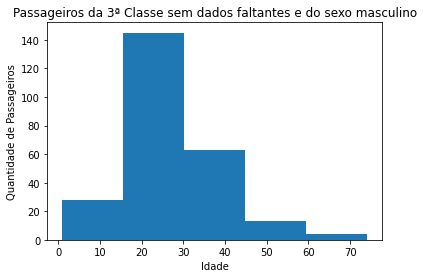

In [ ]:
plt.hist(df["Age"][((df['Sex'] == 'male') & (df['Pclass'] == 3) & (df['Age'].notna()))], bins=5)
plt.title("Passageiros da 3ª Classe sem dados faltantes e do sexo masculino")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

In [ ]:
int(df["Age"][(df['Sex'] == 'male') & (df['Pclass'] == 3) & (df['Age'].notna())].mean())

26

In [ ]:
df["Pclass"][(df['Sex'] == 'female') & (df['Age'].isna())].value_counts()

3    42
1     9
2     2
Name: Pclass, dtype: int64

In [ ]:
df[((df['Sex'] == 'female') & (df['Pclass'] == 3)) & (df['Age'].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.22,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.88,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.75,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.75,NaN,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.79,NaN,Q
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.15,NaN,Q
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.36,F E69,C
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.25,NaN,C
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.50,NaN,Q


In [ ]:
df[((df['Sex'] == 'female') & (df['Pclass'] == 3)) & (df['Age'].notna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.13,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.70,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.85,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.00,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.26,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.22,NaN,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.52,NaN,S


In [ ]:
df["Age"][((df['Sex'] == 'female') & (df['Pclass'] == 3) & (df['Age'].notna()))]

2      26.0
8      27.0
10      4.0
14     14.0
18     31.0
       ... 
855    18.0
858    24.0
875    15.0
882    22.0
885    39.0
Name: Age, Length: 102, dtype: float64

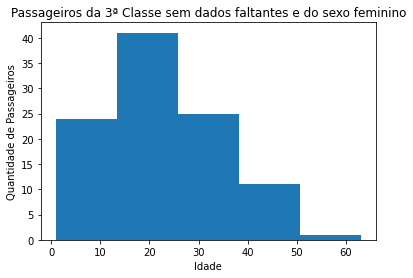

In [ ]:
plt.hist(df["Age"][((df['Sex'] == 'female') & (df['Pclass'] == 3) & (df['Age'].notna()))], bins=5)
plt.title("Passageiros da 3ª Classe sem dados faltantes e do sexo feminino")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

In [ ]:
int(df["Age"][(df['Sex'] == 'female') & (df['Pclass'] == 3) & (df['Age'].notna())].mean())

21

###Atributo: Embarcado

In [ ]:
#aplicando o filtro para identificar pessoas que embarcaram e que sejam da primeira classe 
df["Embarked"][df["Pclass"]==1].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

Apenas dois registos não tem a informação de "Embarked". Ambas são do sexo feminino, da primeira classe e sobreviveram.

In [ ]:
# Apenas dois registos não tem a informação de "Embarked". Ambas são do sexo feminino, da primeira classe e sobreviveram. 
df[(df["Embarked"].isnull())==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Análise das condições 

In [ ]:
#aplicando filtro para identificar pessoas que sobreviveram, sejam do sexo feminino e que 
# o atributo embarcou não seja faltante 
df["Embarked"][(df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex'] == 'female') & (df['Embarked'].notna())].value_counts()

S    46
C    42
Q     1
Name: Embarked, dtype: int64

Filtrando pelas condições acima é possível observar que a basicamente os registros de dividem entre "S" registras e "C".
Assim um registro será substituído por "S" e outro por "C".

Após a operação, o atributo Embarked foi tratado na amostra e não apresentando mais nenhum dando NaN

## Derivação de Atributos

### Idade

Para melhor análise do atributo idade iremos criar faixas de idade que serão as seguintes:

1.   Bebê - de 0 à 1 ano
2.   Crianças - de 1 à 14 anos 
3.   Adolecentes - de 15 à 17 anos
4.   Adultos - de 18 à 64 anos
5.   Idosos - 65 +

In [ ]:
#criando uma valor padrão para as faixas de idade
df_age = df.copy()
df_age['ageGroup'] = 'Não informado'

In [ ]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
df_age['ageGroup'][(df_age['Age'] > 0) & (df_age['Age'] <= 1)] = 'Bebês';
df_age['ageGroup'][(df_age['Age'] > 1) & (df_age['Age'] < 15)] = 'Crianças';
df_age['ageGroup'][(df_age['Age'] >= 15) & (df_age['Age'] <= 17)] = 'Adolecentes';
df_age['ageGroup'][(df_age['Age'] >= 18) & (df_age['Age'] <= 64)] = 'Adultos';
df_age['ageGroup'][(df_age['Age'] >= 65)] = 'Idosos';

<ipython-input-60-718c4dce040e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['ageGroup'][(df_age['Age'] > 0) & (df_age['Age'] <= 1)] = 'Bebês';
<ipython-input-60-718c4dce040e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['ageGroup'][(df_age['Age'] > 1) & (df_age['Age'] < 15)] = 'Crianças';
<ipython-input-60-718c4dce040e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['ageGroup'][(df_age['Age'] >= 15) & (d

In [ ]:
df_age['ageGroup'][df_age['ageGroup'] == 'Idosos'].count()

11

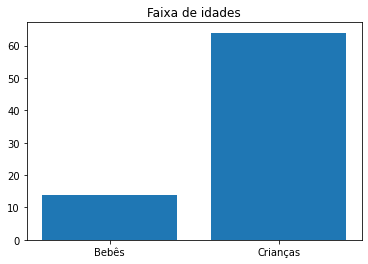

In [ ]:
x=[1,2]
plt.title('Faixa de idades')
plt.bar(x,height=[df_age['ageGroup'][df_age['ageGroup'] == 'Bebês'].count(), 
                  df_age['ageGroup'][df_age['ageGroup'] == 'Crianças'].count()] )
plt.xticks(x, ('Bebês','Crianças'))
plt.show()

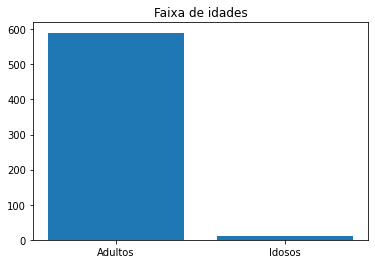

In [ ]:
x=[1,2]
plt.title('Faixa de idades')
plt.bar(x,height=[df_age['ageGroup'][df_age['ageGroup'] == 'Adultos'].count(), 
                  df_age['ageGroup'][df_age['ageGroup'] == 'Idosos'].count()] )
plt.xticks(x, ('Adultos','Idosos'))
plt.show()

### Sexo

Observando visualmente é possivel indetificar uma forte correlação entre o atributo sexo aos demais, com isso, optamos por criar um novo atributo definido como isMale. Este atributo representa o sexo, sendo: 1 = Masculino, 0 = feminino 

In [ ]:
df['isMale'] = 0

In [ ]:
df['isMale'][df['Sex'] == 'male'] = 1

<ipython-input-65-f92173460b77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isMale'][df['Sex'] == 'male'] = 1


<AxesSubplot:>

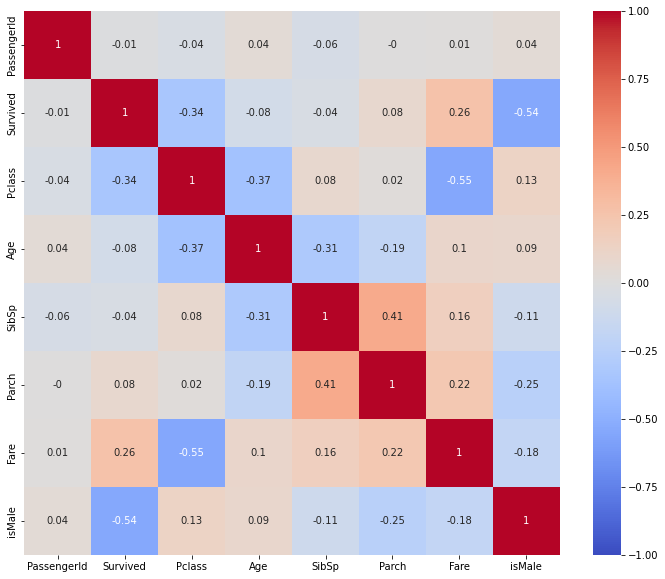

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.heatmap(round(df.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

A partir da criação do novo atributo, isMale, foi possível visualizar através do gráfico maior correlação entre os atributos. Este novo atributo infere se a pessoa é do sexo masculino ou feminino a partir de um dado boleano. É possível observar que o fato da pessoa ter sobrevivido está diretamente relacionado a sua idade e a sua classe.  

## Objeto da análise

### Quais fatores foram determinantes para que alguns sobrevivessem e outros não? 

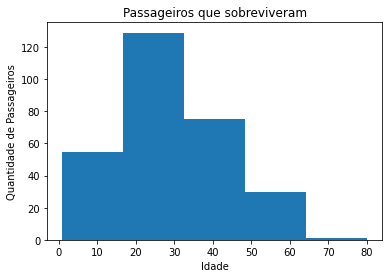

In [ ]:
plt.hist(df['Age'][(df['Survived'] == 1)], bins=5)
plt.title("Passageiros que sobreviveram")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

Quando analisamos a quantidade de sobreviventes em função da idade é possível observar que a maioria dos passageros que morreram apresentavam idade entre 20 e 45 anos.

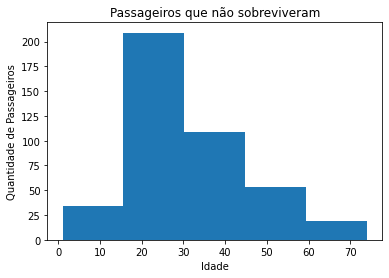

In [ ]:
plt.hist(df['Age'][(df['Survived'] == 0)], bins=5)
plt.title("Passageiros que não sobreviveram")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

Quando analisamos a quantidade de mortos em função da idade é possível observar que a maioria dos passageros que morreram apresentavam idade entre 15 e 45 anos. Deste modo, somente o atributo idade não é capaz e de nos permitir inferir se o passageiro irá ou não morrer ao acidente.

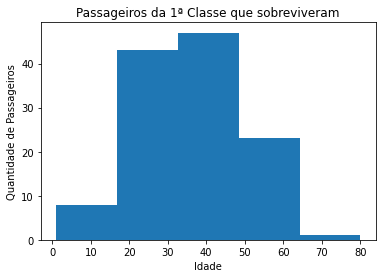

In [ ]:
plt.hist(df['Age'][(df['Survived'] == 1) & (df['Pclass'] == 1)], bins=5)
plt.title("Passageiros da 1ª Classe que sobreviveram")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

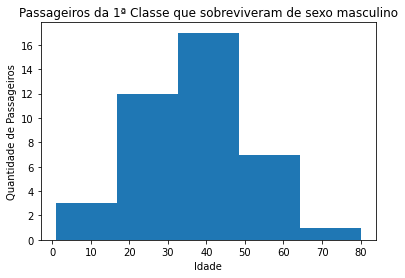

In [ ]:
plt.hist(df['Age'][(df['Survived'] == 1) & (df['Pclass'] == 1) &  (df['Sex'] == 'male')], bins=5)
plt.title("Passageiros da 1ª Classe que sobreviveram de sexo masculino")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

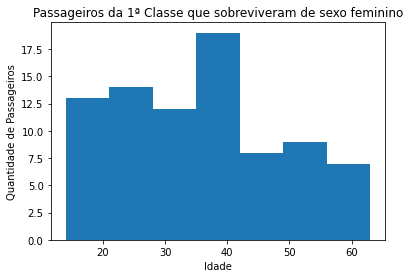

In [ ]:
plt.hist(df['Age'][(df['Survived'] == 1) & (df['Pclass'] == 1) &  (df['Sex'] == 'female')], bins=7)
plt.title("Passageiros da 1ª Classe que sobreviveram de sexo feminino")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

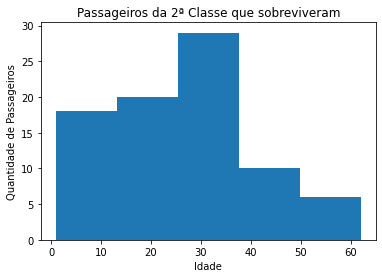

In [ ]:
plt.hist(df['Age'][(df['Survived'] == 1) & (df['Pclass'] == 2)], bins=5)
plt.title("Passageiros da 2ª Classe que sobreviveram")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

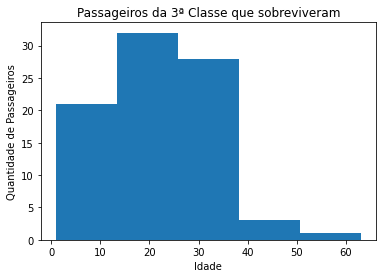

In [ ]:
plt.hist(df['Age'][(df['Survived'] == 1) & (df['Pclass'] == 3)], bins=5)
plt.title("Passageiros da 3ª Classe que sobreviveram")
plt.xlabel('Idade')
plt.ylabel('Quantidade de Passageiros')
plt.show()

In [ ]:
#Função para gerar os barplots para análises 
def gerar_barplot(values_N, values_I, labels, title, legend_N, Legend_Y, label_x, label_Y):
          x = np.arange(len(labels))
          width = 0.35

          fig, ax = plt.subplots(figsize = (14,6))
          barra_nac = ax.bar(x - width/2, values_N, width, label=legend_N)
          barra_inter= ax.bar(x + width/2, values_I, width, label=Legend_Y)

          ax.set_title(title)
          ax.set_xlabel(label_x)
          ax.set_ylabel(label_Y)
          ax.set_xticks(x)
          ax.set_xticklabels(labels)
          ax.legend()

          def autolabel(rects):
              for rect in rects:
                  height = rect.get_height()
                  ax.annotate('{}'.format(height),
                              xy=(rect.get_x() + rect.get_width() / 2, height),
                              xytext=(0, 3),  # 3 points vertical offset
                              textcoords="offset points",
                              ha='center', va='bottom')


          autolabel(barra_nac)
          autolabel(barra_inter)

          fig.tight_layout()
          plt.show()  

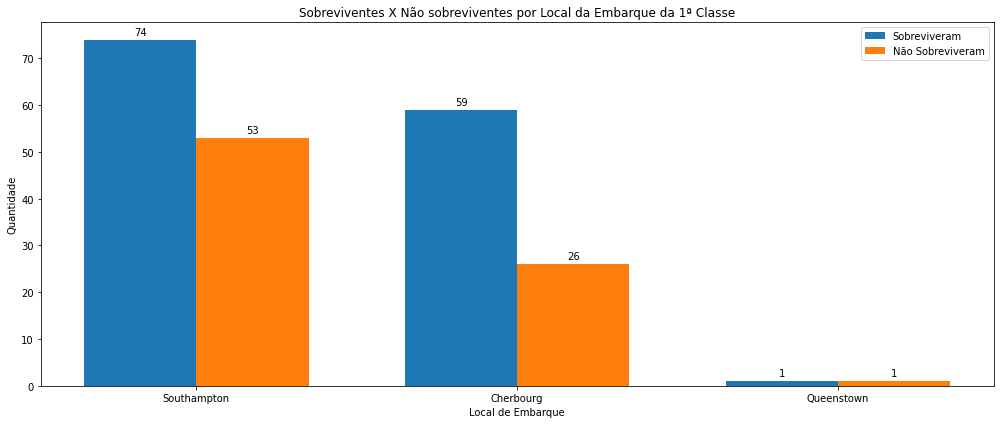

In [ ]:
total_embarked_q = df['Embarked'][(df['Survived'] == 1) & (df['Embarked'] == 'Q') & (df['Pclass'] == 1)].count()
total_embarked_s = df['Embarked'][(df['Survived'] == 1) & (df['Embarked'] == 'S')  & (df['Pclass'] == 1)].count()
total_embarked_c = df['Embarked'][(df['Survived'] == 1) & (df['Embarked'] == 'C')  & (df['Pclass'] == 1)].count()

total_embarked_q_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Embarked'] == 'Q')  & (df['Pclass'] == 1)].count()
total_embarked_s_n_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Embarked'] == 'S')  & (df['Pclass'] == 1)].count()
total_embarked_c_n_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Embarked'] == 'C')  & (df['Pclass'] == 1)].count()

labels = ('Southampton', 'Cherbourg', 'Queenstown')
values_N = [total_embarked_s, total_embarked_c, total_embarked_q]
values_I = [total_embarked_s_n_notsurvived, total_embarked_c_n_notsurvived, total_embarked_q_notsurvived]
gerar_barplot(values_N, values_I, labels, 'Sobreviventes X Não sobreviventes por Local da Embarque da 1ª Classe', 'Sobreviveram', 'Não Sobreviveram', 'Local de Embarque', 'Quantidade')

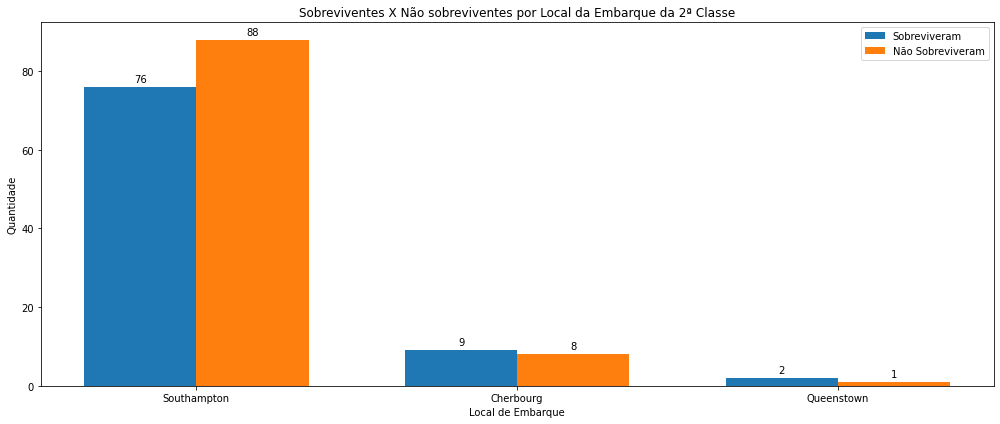

In [ ]:
total_embarked_q = df['Embarked'][(df['Survived'] == 1) & (df['Embarked'] == 'Q') & (df['Pclass'] == 2)].count()
total_embarked_s = df['Embarked'][(df['Survived'] == 1) & (df['Embarked'] == 'S')  & (df['Pclass'] == 2)].count()
total_embarked_c = df['Embarked'][(df['Survived'] == 1) & (df['Embarked'] == 'C')  & (df['Pclass'] == 2)].count()

total_embarked_q_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Embarked'] == 'Q')  & (df['Pclass'] == 2)].count()
total_embarked_s_n_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Embarked'] == 'S')  & (df['Pclass'] == 2)].count()
total_embarked_c_n_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Embarked'] == 'C')  & (df['Pclass'] == 2)].count()

labels = ('Southampton', 'Cherbourg', 'Queenstown')
values_N = [total_embarked_s, total_embarked_c, total_embarked_q]
values_I = [total_embarked_s_n_notsurvived, total_embarked_c_n_notsurvived, total_embarked_q_notsurvived]
gerar_barplot(values_N, values_I, labels, 'Sobreviventes X Não sobreviventes por Local da Embarque da 2ª Classe', 'Sobreviveram', 'Não Sobreviveram', 'Local de Embarque', 'Quantidade')

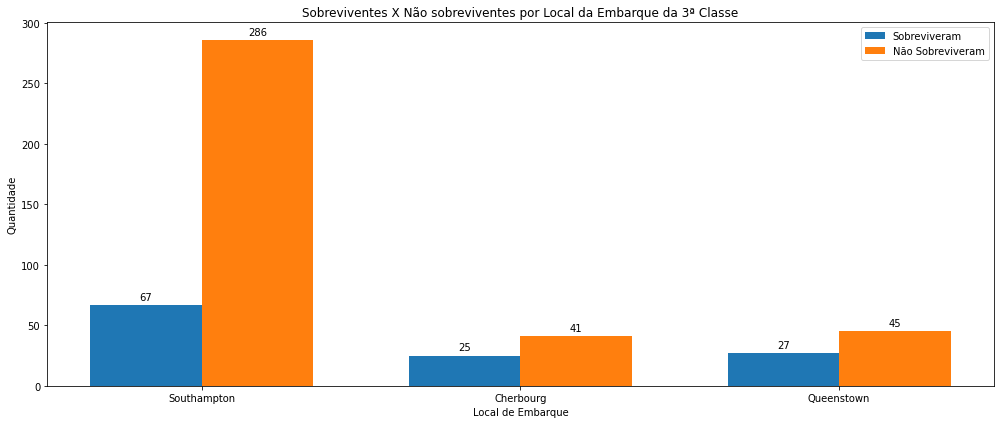

In [ ]:
total_embarked_q = df['Embarked'][(df['Survived'] == 1) & (df['Embarked'] == 'Q') & (df['Pclass'] == 3)].count()
total_embarked_s = df['Embarked'][(df['Survived'] == 1) & (df['Embarked'] == 'S')  & (df['Pclass'] == 3)].count()
total_embarked_c = df['Embarked'][(df['Survived'] == 1) & (df['Embarked'] == 'C')  & (df['Pclass'] == 3)].count()

total_embarked_q_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Embarked'] == 'Q')  & (df['Pclass'] == 3)].count()
total_embarked_s_n_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Embarked'] == 'S')  & (df['Pclass'] == 3)].count()
total_embarked_c_n_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Embarked'] == 'C')  & (df['Pclass'] == 3)].count()

labels = ('Southampton', 'Cherbourg', 'Queenstown')
values_N = [total_embarked_s, total_embarked_c, total_embarked_q]
values_I = [total_embarked_s_n_notsurvived, total_embarked_c_n_notsurvived, total_embarked_q_notsurvived]
gerar_barplot(values_N, values_I, labels, 'Sobreviventes X Não sobreviventes por Local da Embarque da 3ª Classe', 'Sobreviveram', 'Não Sobreviveram', 'Local de Embarque', 'Quantidade')

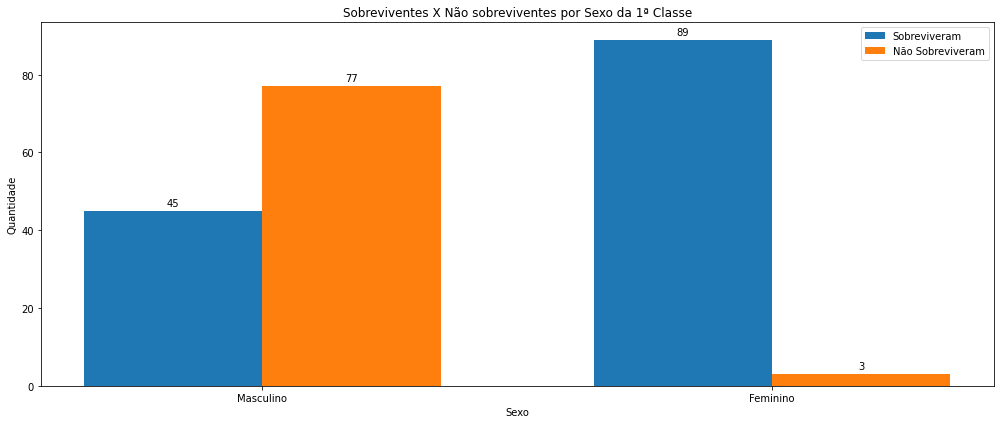

In [ ]:
total_p1class_m = df['Embarked'][(df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex'] == 'male')].count()
total_p1class_f = df['Embarked'][(df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex'] == 'female')].count()

total_p1class_m_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Pclass'] == 1) & (df['Sex'] == 'male')].count()
total_p1class_f_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Pclass'] == 1) & (df['Sex'] == 'female')].count()

labels = ('Masculino', 'Feminino')
values_N = [total_p1class_m, total_p1class_f]
values_I = [total_p1class_m_notsurvived, total_p1class_f_notsurvived]
gerar_barplot(values_N, values_I, labels, 'Sobreviventes X Não sobreviventes por Sexo da 1ª Classe', 'Sobreviveram', 'Não Sobreviveram', 'Sexo', 'Quantidade')

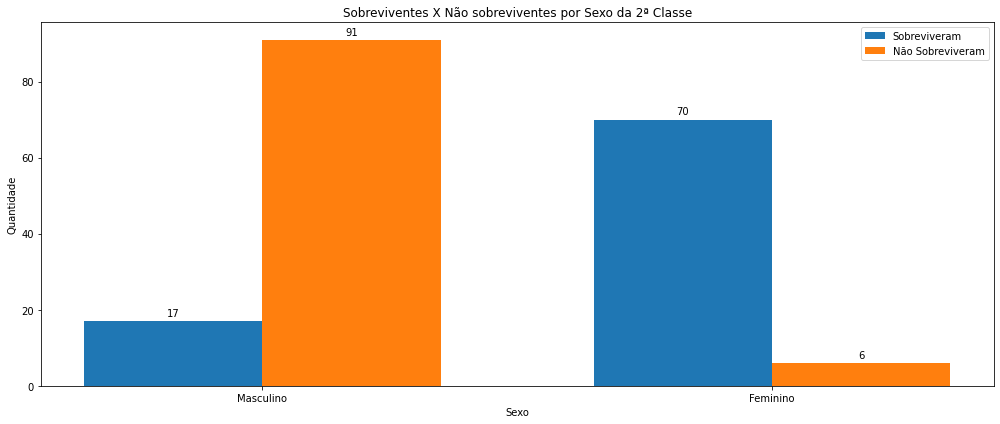

In [ ]:
total_p1class_m = df['Embarked'][(df['Survived'] == 1) & (df['Pclass'] == 2) & (df['Sex'] == 'male')].count()
total_p1class_f = df['Embarked'][(df['Survived'] == 1) & (df['Pclass'] == 2) & (df['Sex'] == 'female')].count()

total_p1class_m_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Pclass'] == 2) & (df['Sex'] == 'male')].count()
total_p1class_f_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Pclass'] == 2) & (df['Sex'] == 'female')].count()

labels = ('Masculino', 'Feminino')
values_N = [total_p1class_m, total_p1class_f]
values_I = [total_p1class_m_notsurvived, total_p1class_f_notsurvived]
gerar_barplot(values_N, values_I, labels, 'Sobreviventes X Não sobreviventes por Sexo da 2ª Classe', 'Sobreviveram', 'Não Sobreviveram', 'Sexo', 'Quantidade')

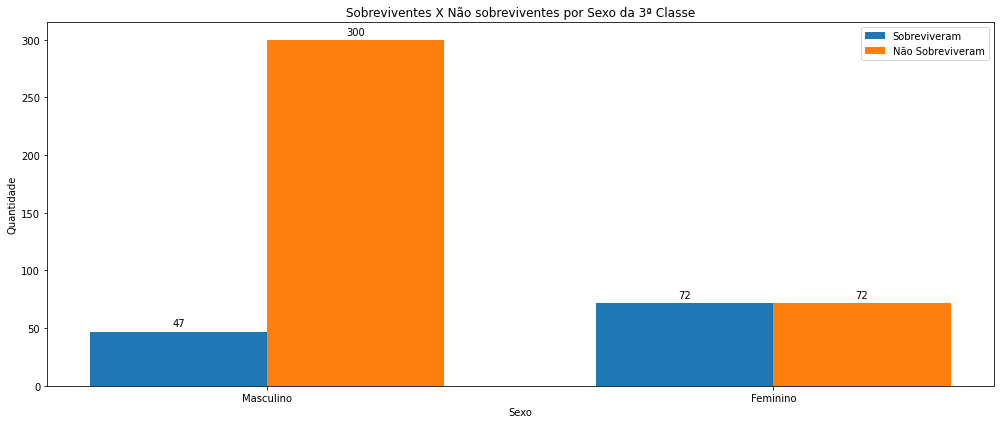

In [ ]:
total_p1class_m = df['Embarked'][(df['Survived'] == 1) & (df['Pclass'] == 3) & (df['Sex'] == 'male')].count()
total_p1class_f = df['Embarked'][(df['Survived'] == 1) & (df['Pclass'] == 3) & (df['Sex'] == 'female')].count()

total_p1class_m_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Pclass'] == 3) & (df['Sex'] == 'male')].count()
total_p1class_f_notsurvived = df['Embarked'][(df['Survived'] == 0) & (df['Pclass'] == 3) & (df['Sex'] == 'female')].count()

labels = ('Masculino', 'Feminino')
values_N = [total_p1class_m, total_p1class_f]
values_I = [total_p1class_m_notsurvived, total_p1class_f_notsurvived]
gerar_barplot(values_N, values_I, labels, 'Sobreviventes X Não sobreviventes por Sexo da 3ª Classe', 'Sobreviveram', 'Não Sobreviveram', 'Sexo', 'Quantidade')

Podemos destacar que como fator que define a possibilidade de sobreviver ao acidente os seguintes fatores: ser mulher, estar na 1ª ou 2ª Classe do navio e possuir idade entre 15 e 55 anos 

# Pré-processamento 

### Funções em Python

In [ ]:
def pre_processar(df:pd.core.frame.DataFrame, dropPassengerId = True):
  
  #declaração de variaveis
  _media=0
  _df = df.copy()
  
  #Remoção de espaços em branco 
  _df.columns.str.strip().str.replace(' ', '_')

  #remoção de atributos do dataset
  _df.drop(columns=['Name'], inplace = True)
  if(dropPassengerId):
    _df.drop(columns=['PassengerId'], inplace = True)
  _df.drop(columns=['Ticket'], inplace = True)
  _df.drop(columns=['Embarked'], inplace = True)

  #tratamento para ocorrência do registro de cabine em True ou False, possui ou não possui
  _df['containCabin'] = 0
  _df["containCabin"][_df['Cabin'].isna()] = 1
  _df.drop(columns=['Cabin'], inplace = True)

  #Tratamento de ocorrência ao dado NaN no atributo 'Age'
  while (_df["Age"][_df['Age'].isna()].unique()):
    if(np.isnan(_df["Age"][((_df['Sex'] == 'male') & (_df['Pclass'] == 1) & (_df['Age'].isna()))]).unique()):
      _media=41
      _df["Age"][((_df['Sex'] == 'male') & (_df['Pclass'] == 1) & (_df['Age'].isna()))]=_media
    elif(np.isnan(_df["Age"][((_df['Sex'] == 'male') & (_df['Pclass'] == 2) & (_df['Age'].isna()))]).unique()):
      _media=30
      _df["Age"][((_df['Sex'] == 'male') & (_df['Pclass'] == 2) & (_df['Age'].isna()))]=_media
    elif(np.isnan(_df["Age"][((_df['Sex'] == 'male') & (_df['Pclass'] == 3) & (_df['Age'].isna()))]).unique()):
      _media=26
      _df["Age"][((_df['Sex'] == 'male') & (_df['Pclass'] == 3) & (_df['Age'].isna()))]=_media
    elif(np.isnan(_df["Age"][((_df['Sex'] == 'female') & (_df['Pclass'] == 1) & (_df['Age'].isna()))]).unique()):
      _media=34
      _df["Age"][((_df['Sex'] == 'female') & (_df['Pclass'] == 1) & (_df['Age'].isna()))]=_media
    elif(np.isnan(_df["Age"][((_df['Sex'] == 'female') & (_df['Pclass'] == 2) & (_df['Age'].isna()))]).unique()):
      _media=28
      _df["Age"][((_df['Sex'] == 'female') & (_df['Pclass'] == 2) & (_df['Age'].isna()))]=_media
    elif (np.isnan(_df["Age"][((_df['Sex'] == 'female') & (_df['Pclass'] == 3) & (_df['Age'].isna()))]).unique()):
      _media=21
      _df["Age"][((_df['Sex'] == 'female') & (_df['Pclass'] == 3) & (_df['Age'].isna()))]=_media
    else:
      _media=21
      _df["Age"][_df['Age'].isna()]=_media

  _df['isMale'] = 0
  _df['isMale'][_df['Sex'] == 'male'] = 1
  #remoção de atributos do dataset
  _df.drop(columns=['Sex'], inplace = True)

  return _df

def pre_processar_get_data(df:pd.core.frame.DataFrame):
  #remoção de atributos do dataset
  _df = df.copy()
  _df.drop(columns=['Survived'], inplace = True)
  return _df.to_numpy()

def pre_processar_get_target(df:pd.core.frame.DataFrame):
  #remoção de atributos do dataset
  _df = df.copy()
  _df = df['Survived']
  return _df.to_numpy()


## Prepração dos dados e sepração em dados de treino e teste

<AxesSubplot:>

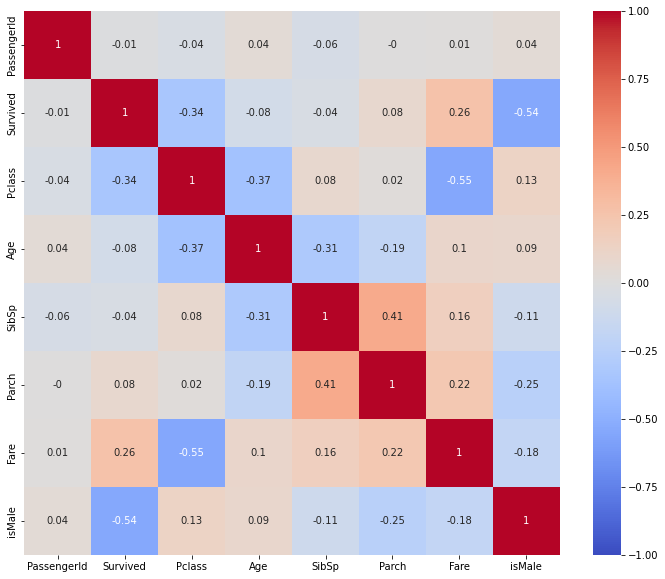

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 10)
sns.heatmap(round(df.corr(),2), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Inicialmente analisamos graficamente a correlação entre os atributos, vale destacar que o atributo PassengerId será removido da amostra por se tratar de um atributo de identificação única de cada registro, outro atributo que será removido, embora não apresentado na matriz de correlação será o atributo Name. Através do gráfico é possível observar que o fato do passageiro ter sobrevivido ou não possui uma forte correlação com a classe que o mesmo ocupa e a idade do passageiro informações que serão exploradas no decorrer da análise  

In [ ]:
df_treino_preocessado = pre_processar(df)
df_teste_preocessado = pre_processar(df,False) # Não remove o atributo PassengerId

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split( 
                        pre_processar_get_data(df_treino_preocessado),pre_processar_get_target(df_treino_preocessado),
                        test_size = 0.30, random_state = 101)

#dados de teste, sem a varivale target
#x_teste = np.array(pre_processar_get_data(df_teste_preocessado)) # matriz de instâncias


# Geração de Modelos

## Treinamento de algoritmo e métricas 

### KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_treino, y_treino)
predictions = neigh.predict(x_teste)


accuracy = accuracy_score(y_teste, predictions)
print("Acurácia:", accuracy)
precision = precision_score(y_teste, predictions)
print("Precisão:", precision)
recall = recall_score(y_teste, predictions)
print("Recall:", recall)

print(classification_report(y_teste, predictions))

Acurácia: 0.6977611940298507
Precisão: 0.6941176470588235
Recall: 0.5175438596491229
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       154
           1       0.69      0.52      0.59       114

    accuracy                           0.70       268
   macro avg       0.70      0.67      0.68       268
weighted avg       0.70      0.70      0.69       268



####Aplicação do GridSearch para tuning de parâmetros do modelo - KNN

In [ ]:
#Os parâmetros numéricos foram escolhidos e variados de acordo com o resultado de acurácia. Por sua vez, para os não numéricos
#foram utilizadas as opções possíveis para obter-se a melhor combinação.
parameters_KNN = {'n_neighbors': range(1,30,1),
              'weights':['uniform','distance'],
              'metric':['euclidean','manhattan','minkowski'],
              'leaf_size': range(1,20,1)
              }

In [ ]:
grid_search=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameters_KNN)
grid_search.fit(x_treino, y_treino)
parameters_improved=grid_search.best_params_
best_result= grid_search.best_score_
print(parameters_improved)
print(best_result)

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
0.7688903225806453


### SVM

In [ ]:
# Create SVM classification object 
model = svm.SVC(kernel='linear', gamma=1)
model.fit(x_treino, y_treino)
model.score(x_treino, y_treino)
#Predict Output
predicted= model.predict(x_teste)

accuracy = accuracy_score(y_teste, predicted)
print("Acurácia:", accuracy)
precision = precision_score(y_teste, predicted)
print("Precisão:", precision)
recall = recall_score(y_teste, predicted)
print("Recall:", recall)

print(classification_report(y_teste, predicted))

Acurácia: 0.7649253731343284
Precisão: 0.7684210526315789
Recall: 0.6403508771929824
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.77      0.64      0.70       114

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268



####Aplicação do GridSearch para tuning de parâmetros do modelo - SVM

In [ ]:
#Criando dois laços for para cobrir ranges de parâmetros para tuning do modelo.
#gamma_SVM=[int (x) for x in np.linspace(start=0.001, stop=1)]
#C_SVM=[int (x) for x in np.linspace(start=1, stop=2)]
gamma_SVM = [1, 0.1, 0.01, 0.001, 0.0001]
C_SVM = [0.1, 1, 10, 100]
parameters_SVM = {'gamma': gamma_SVM,
              'C': C_SVM,
              'gamma':['scale', 'auto'],
              'kernel':['linear']}

In [ ]:
#grid_search=GridSearchCV(estimator=svm.SVC(),param_grid=parameters_SVM)
grid = GridSearchCV(estimator=svm.SVC(), param_grid=parameters_SVM, refit = True, verbose = 3,n_jobs=-1)
grid_search.fit(x_treino, y_treino)
parameters_improved=grid_search.best_params_
best_result= grid_search.best_score_
print(parameters_improved)
print(best_result)

### RandomForest

In [ ]:
model = RandomForestClassifier(n_estimators = 9)
model_fit = model.fit(x_treino, y_treino)
predicted = model_fit.predict(x_teste)

print(classification_report(y_teste, predicted))

####Aplicação do GridSearch para tuning de parâmetros do modelo - Random Forest

In [ ]:
#Criando um for para cobrir um range de estimadores para parâmetro do tuning. Foi possível observar que a medida em que o parâmetro 'start'
#aumenta, obtem-se também um melhor resultado de acurácia. Os valores foram escolhidos e variados com o objetivo de
#obtenção do melhor resultado de acurácia.
n_estimators_GS=[int (x) for x in np.linspace(start=13, stop=25,num=1)]
parameters_RF = {'n_estimators': n_estimators_GS}

In [ ]:
grid_search=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parameters_RF)
grid_search.fit(x_treino, y_treino)
parameters_improved=grid_search.best_params_
best_result= grid_search.best_score_
print(parameters_improved)
print(best_result)

{'n_estimators': 13}
0.7913677419354839


### Decision Tree

In [ ]:
tree = DecisionTreeClassifier(criterion='gini',
min_samples_leaf=5,
min_samples_split=5,
max_depth=None,
random_state=10)
tree.fit(x_treino, y_treino)
predicted = tree.predict(x_teste)
accuracy = accuracy_score(y_teste, predicted)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))
print(classification_report(y_teste, predicted))


DecisionTreeClassifier accuracy score: 0.7985074626865671
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       154
           1       0.80      0.70      0.75       114

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



####Aplicação do GridSearch para tuning de parâmetros do modelo - Decision Tree





In [ ]:
#Os parâmetros numéricos foram escolhidos e variados de acordo com o resultado de acurácia. Por sua vez, para os não numéricos
#foram utilizadas as opções possíveis para obter-se a melhor combinação.

parameters_DT = {'criterion': ['gini','entropy'],
              'splitter':['best','random'],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[5,10]}

In [ ]:
grid_search=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters_DT)
grid_search.fit(x_treino, y_treino)
parameters_improved=grid_search.best_params_
best_result= grid_search.best_score_
print(parameters_improved)
print(best_result)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}
0.8218967741935485


# Geração do arquivo para submissão no Kaggle

In [ ]:
#dados de teste 
df_treino_preocessado = pre_processar(df,False)

x_treino, x_teste, y_treino, y_teste = train_test_split(pre_processar_get_data(df_treino_preocessado), 
                                                             pre_processar_get_target(df_treino_preocessado),test_size = 0.30, random_state = 101)

x_test = np.array(pre_processar_get_data(df_teste_preocessado)) # matriz de instâncias

Preparação dos dados de treino e teste para aplicação do algoritmo SVM

In [ ]:
# Create SVM classification object 
model = svm.SVC(kernel='linear', gamma=1)
model.fit(x_treino, y_treino)
#Predict Output
Y_prediction= model.predict(x_test)

Script para gerar csv no formato de submissão aceito pelo Kaggle:

In [ ]:
submission = pd.DataFrame({
        "PassengerId": df_teste_preocessado["PassengerId"],
        "Survived": Y_prediction
    })
submission.to_csv('submission.csv', index=False)

#Geração do dataset pré-processado

In [ ]:
df_processado = pre_processar(df)
df_processado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   containCabin  891 non-null    int64  
 7   isMale        891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


<ipython-input-4-884099a7f5f2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df["containCabin"][_df['Cabin'].isna()] = 1
<ipython-input-4-884099a7f5f2>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df["Age"][((_df['Sex'] == 'male') & (_df['Pclass'] == 1) & (_df['Age'].isna()))]=_media
<ipython-input-4-884099a7f5f2>:24: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if(np.isnan(_df["Age"][((_df['Sex'] == 'male') & (_df['Pclass'] == 1) & (_df['Age'].isna()))]).unique()):


Como resultado final da etapa de pré-processamento todos os registros que apresentavam dados faltantes (NaN) foram tratados no dataset, além disso, foram criados novos atributos que aprimoraram a correlação entre eles e permitindo melhores análises do dataset

In [ ]:
# realizando a exportação do dataset pré-processado
df_processado.to_csv('titanic_preprocessado.csv',sep = ';')

#Criação do dataset de teste

In [ ]:
# Colunas: Survived;Pclass;Age;SibSp;Parch;Fare;isMale;containCabin
size=891
Survived = np.random.randint(0,2,size)
Pclass = np.random.randint(1, 3, size)
Age = np.random.randint(1, 88, size)
SibSp = np.random.randint(0, 8, size)
Parch=np.random.randint(0, 10, size)
Fare=np.random.randint(10, 65, size)
IsMale=np.random.randint(0, 2,size)
containCabin=np.random.randint(0,2,size)

df_test=pd.DataFrame({'Survived': Survived, 'Pclass': Pclass, 'Age': Age, 'SibSp': SibSp,'Parch': Parch,'Fare':Fare,'IsMale':IsMale,'containCabin':containCabin})
df_test

,Survived,Pclass,Age,SibSp,Parch,Fare,IsMale,containCabin
0,1,1,32,2,7,25,0,1
1,1,2,19,5,5,47,1,1
2,0,1,28,7,7,25,0,0
3,1,1,16,3,1,25,0,0
4,0,1,37,4,6,37,1,1
...,...,...,...,...,...,...,...,...
886,1,1,36,3,3,44,0,1
887,0,1,28,3,3,37,1,1
888,0,2,52,1,1,13,0,1
889,1,2,54,1,9,37,0,1
